<a href="https://colab.research.google.com/github/MohdHassanS/My-projects/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **1.Exploring the Data**

In [3]:
df = pd.read_csv("/content/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(columns = ['Unnamed: 32','id'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **2.EDA**

## **Checking skew**

In [9]:
# Skewness is a measure of the asymmetry of the probability distribution 
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The mean, standard error and "worst" or largest (mean of the three largest values) of
these features were computed for each image, resulting in 30 features. For instance, field
3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [12]:
df_mean = df.iloc[:,1:11]
df_se = df.iloc[:,11:21]
df_worst = df.iloc[:,22:]

print(df_mean.columns)
print(df_se.columns)
print(df_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## **Distribution plot**

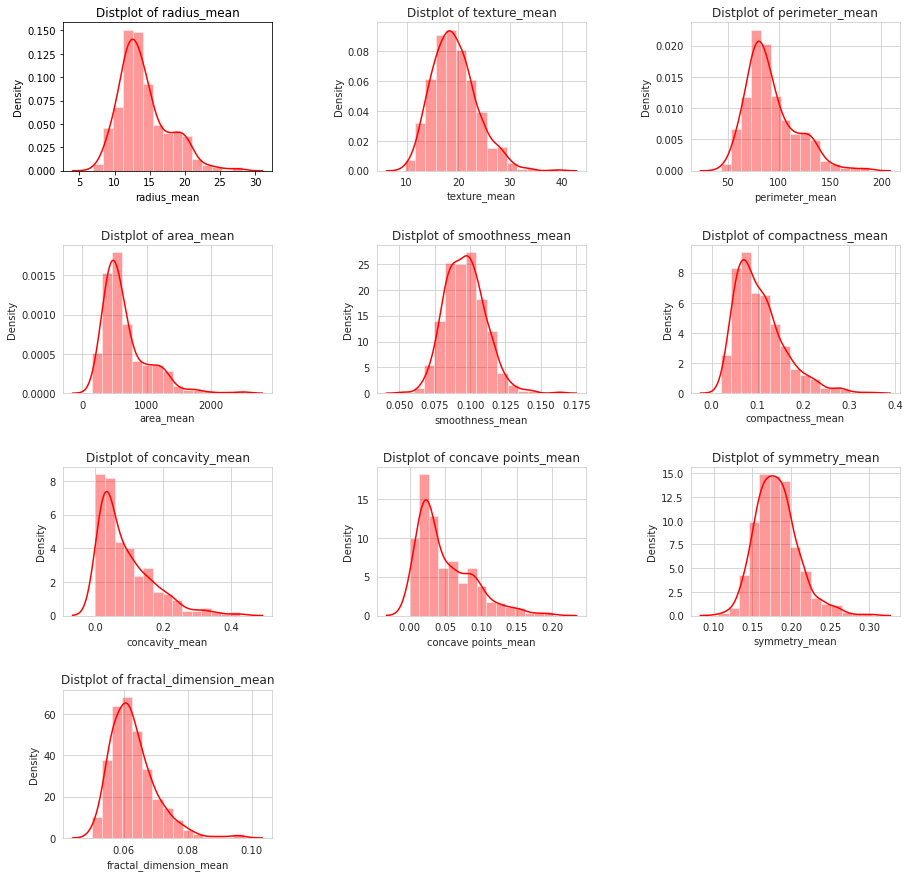

In [13]:
plt.figure(1 , figsize = (15 , 15))
n = 0 
for x in df_mean.columns:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.distplot(df[x] , bins = 15, color='red')
    plt.title('Distplot of {}'.format(x))
plt.show()

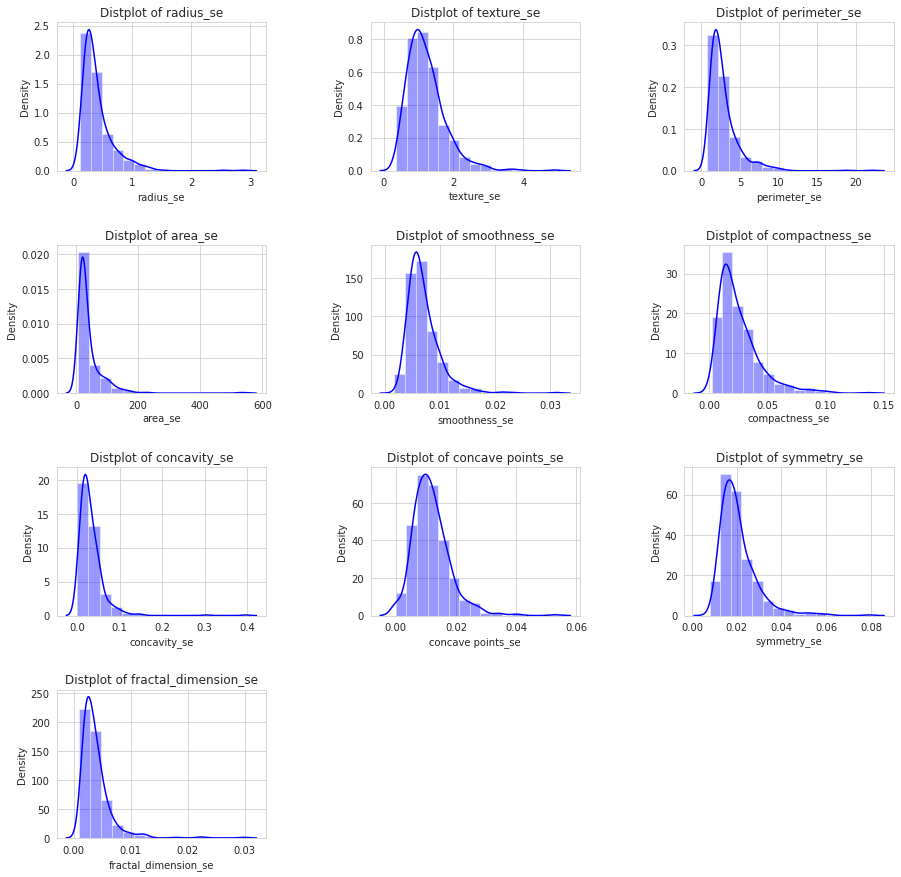

In [14]:
plt.figure(1 , figsize = (15 , 15))
n = 0 
for x in df_se.columns:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.distplot(df[x] , bins = 15, color='blue')
    plt.title('Distplot of {}'.format(x))
plt.show()

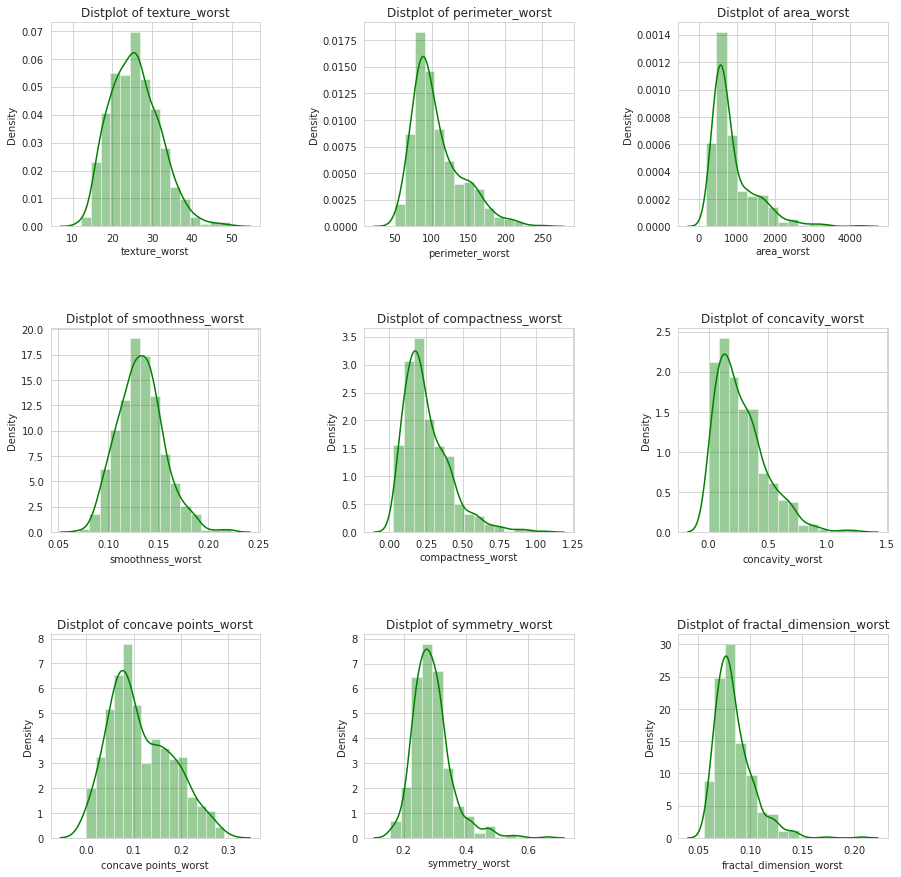

In [15]:
plt.figure(1 , figsize = (15 , 15))
n = 0 
for x in df_worst.columns:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.distplot(df[x] , bins = 15, color='green')
    plt.title('Distplot of {}'.format(x))
plt.show()

1.   We can see that perhaps the attributes $\color{red}{\text{perimeter, radius, area, concavity, compactness & concave points may have an exponential distribution()}}$.
2.   We can also see that perhaps the attributes $\color{red}{\text{texture, smoothness, symmetry, fractal_dimension attributes may have a Gaussian or nearly Gaussian distribution}}$.
3.   This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## **Box plot**

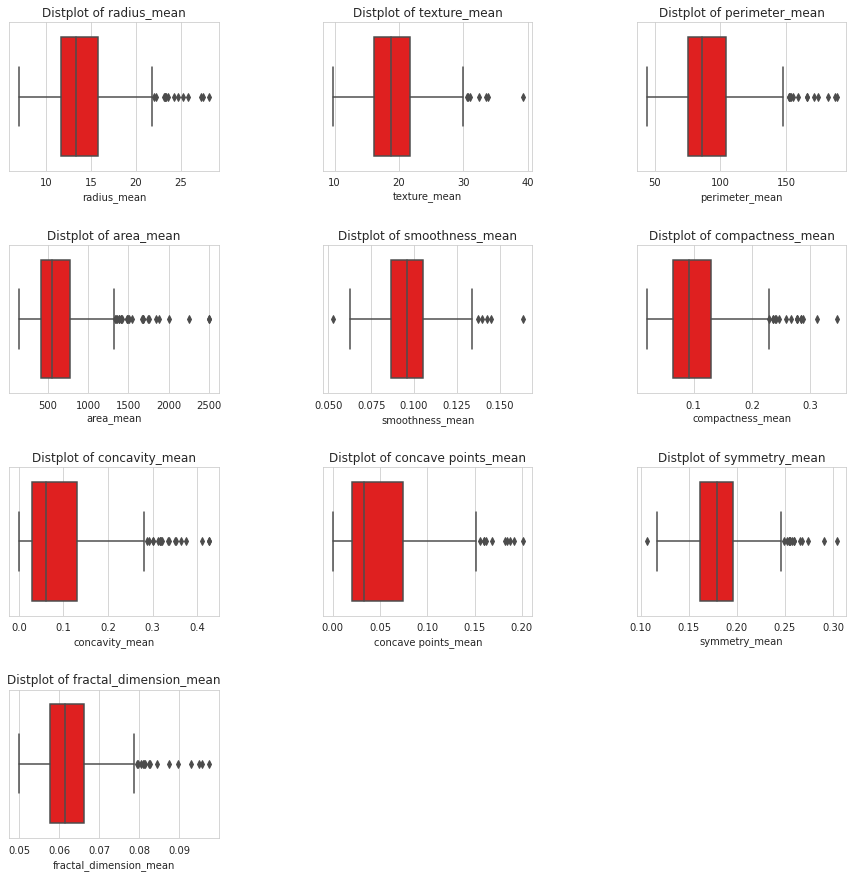

In [16]:
plt.figure(figsize = (15 , 15))
n = 0 
for x in df_mean.columns:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.boxplot(df[x] ,color='red',)
    plt.title('Distplot of {}'.format(x))
plt.show()

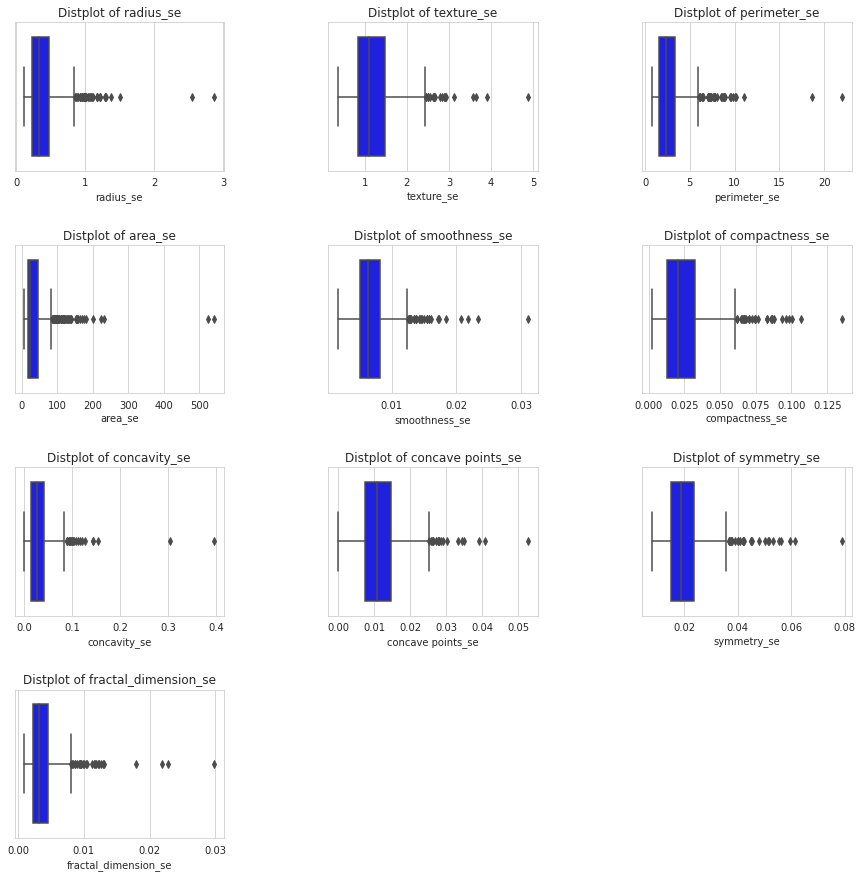

In [17]:
plt.figure(figsize = (15 , 15))
n = 0 
for x in df_se.columns:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.boxplot(df[x] ,color='blue',)
    plt.title('Distplot of {}'.format(x))
plt.show()

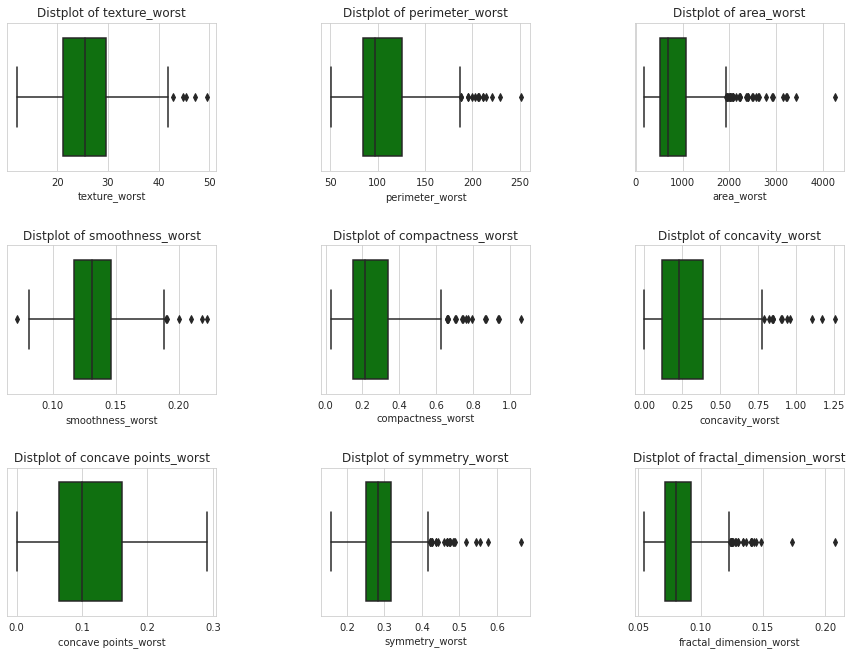

In [18]:
plt.figure(figsize = (15 , 15))
n = 0 
for x in df_worst.columns:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_style('whitegrid')
    sns.boxplot(df[x] ,color='green',)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Heat Map**

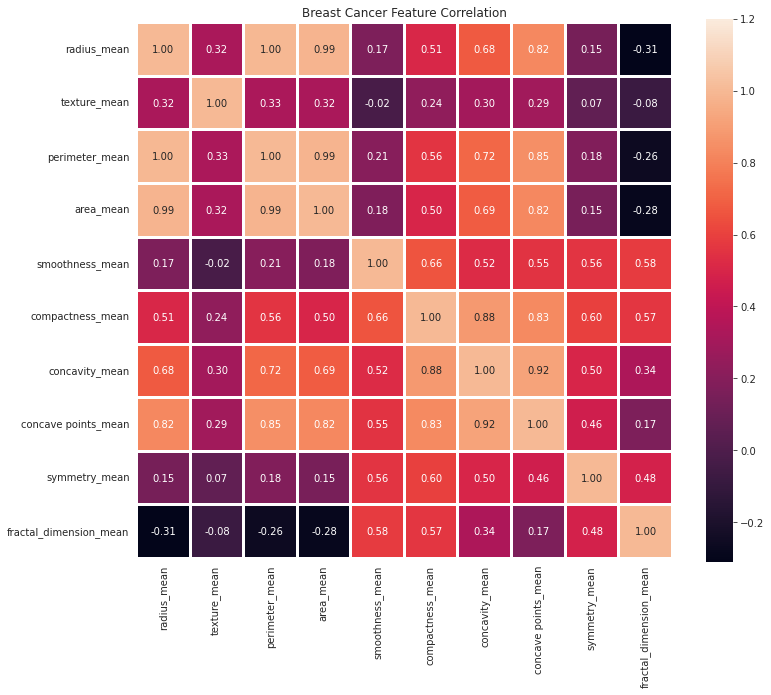

In [20]:
plt.figure(figsize = (12 , 10))
ax = sns.heatmap(df_mean.corr(), square='square', vmax=1.2, annot=True, fmt=".2f", linewidths=2)
plt.title('Breast Cancer Feature Correlation')
plt.show()

## **Observation:**
*  We can see strong positive relationship exists with mean values paramaters between 1-0.75 :
  - The area mean of the tissue nucleus has a strong positive correlation with radius mean and perimeter mean
* Some paramters are moderately positive corrlated between 0.5-0.75 :
  - are concavity and area, concavity and perimeter etc
* Likewise, we see some strong negative correlation between :
  - fractal_dimension with radius, texture, parameter mean values.

# **3.Data Preprocessing**

Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:

* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

## **Encoding the data**

Instead of using Label encoder ....I just mapping the categorical column

In [21]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

## **Feature Standardization**

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

* As seen in Exploratory data analysis the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

* Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [23]:
# Normalize the  data (center around 0 and scale to remove the variance).
from sklearn.preprocessing import StandardScaler
x_scal = StandardScaler().fit_transform(x)

In [24]:
x_s = pd.DataFrame(x_scal, columns = x.columns)
x_s.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## **Train Test Split**

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

* Split the available data into a training set and a testing set. (80% training, 20% test)
* Train the algorithm on the first part,
make predictions on the second part and
* evaluate the predictions against the expected results.
* The size of the split can depend on the size and specifics of your dataset, although it is common to use 80% of the data for training and the remaining 20% for testing.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_s, y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

# **4.Predective Model Using SVM**

Support vector machines (SVMs) learning algorithm will be used to build the predictive model. SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995).
* SVMs allow for complex decision boundaries, even if the data has only a few features.
* They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.
Running an SVM on data with up to 10,000 samples might work well, but working
with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.
* SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.
* SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

In [26]:
from sklearn.svm import SVC

In [27]:
# Create an SVM classifier and train it on 80% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [28]:
 # Analyze accuracy of predictions on 20% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.97



## **Confusion Matrix**

*   It helps to find out the accuracy of the Predicted Output.
*   It will also tell the no of correct and wrong Predictions [ [TP, FP], [FN,TN] ]
*   It also measures the Preformance of our ML Classification Model.
*   It also gives you the count of the data.

In [33]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[73,  1],
       [ 2, 38]])

## **Classification Report**

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model. 
* **Precision** :	Precision is defined as the ratio of true positives to the sum of true and false positives.
* **Recal**l : Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
* **F1 Score** :	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
* **Support**	: Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.97      0.95      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [36]:
y_test.value_counts()

diagnosis
0            74
1            40
dtype: int64

## **Observation**

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

* The classifier made a total of 114 predictions   
(i.e 114 patients were being tested for the presence breast cancer).
*Out of those 114 cases, the classifier predicted "yes" 38 times, and "no" 73 times.
*In reality, 40 patients in the sample have the disease, and 74 patients do not.

# **5.Comparing with Other Different classifiers**

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
pd.DataFrame(models)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.98,0.98,0.98,0.05
LinearSVC,0.97,0.97,0.97,0.97,0.06
PassiveAggressiveClassifier,0.97,0.97,0.97,0.97,0.02
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.07
SVC,0.97,0.97,0.97,0.97,0.06
QuadraticDiscriminantAnalysis,0.97,0.97,0.97,0.97,0.04
XGBClassifier,0.97,0.97,0.97,0.97,0.21
RidgeClassifierCV,0.97,0.97,0.97,0.97,0.04
RidgeClassifier,0.97,0.97,0.97,0.97,0.02


# **6.Conclusion**

After all the process ...
* I have used SVM model to predict the Results ...and got a accuracy score of 0.97
* Next I have compared with Other different classifiers...Just to check the behavior of the dataset on those classifiers....From that we can see The logisticRegression have a performed better than SVM with accuracy score of 0.98
 